### Setting Up the Notebook

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Load Dubai font
font_path = r"C:\Windows\Fonts\Dubai-Regular.ttf"
dubai_font = fm.FontProperties(fname=font_path)

### Load and Clean Data

In [2]:
# Load your prepared dataset
file_path = r'C:\Users\moein\anaconda3\06_World Happiness Report 2024\02 Data\Prepared Data\Cleaned_World_Happiness_2024.csv'
df = pd.read_csv(file_path)

In [3]:
# Check structure and missing data
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2363 non-null   float64
 4   Social support                    2363 non-null   float64
 5   Healthy life expectancy at birth  2363 non-null   float64
 6   Freedom to make life choices      2363 non-null   float64
 7   Generosity                        2363 non-null   float64
 8   Perceptions of corruption         2363 non-null   float64
 9   Positive affect                   2363 non-null   float64
 10  Negative affect                   2363 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
None
Count

C:\Users\moein\AppData\Local\Temp\ipykernel_23176\4241788813.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Log GDP per capita'], bins=25) # Shows extreme values


<Axes: xlabel='Log GDP per capita', ylabel='Density'>

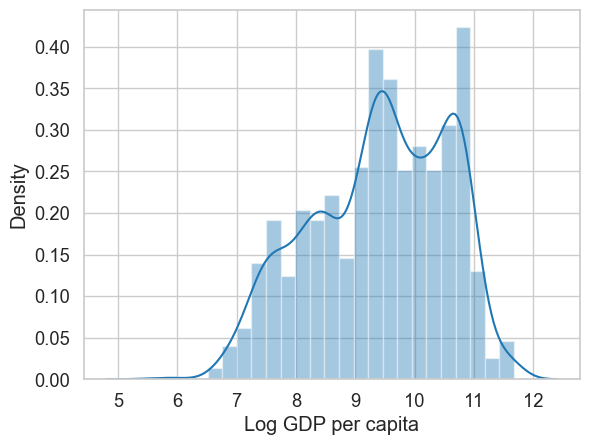

In [13]:
# Extreme values checks
sns.distplot(df['Log GDP per capita'], bins=25) # Shows extreme values

In [4]:
# Check the mean
df['Log GDP per capita'].mean()

9.399671092077089

In [15]:
# Check the median
df['Log GDP per capita'].median()

9.492

In [16]:
# Check the max
df['Log GDP per capita'].max()

11.676

### Visualizing Exploration of Relationships

#### Scatterplot of GDP vs. Life Ladder

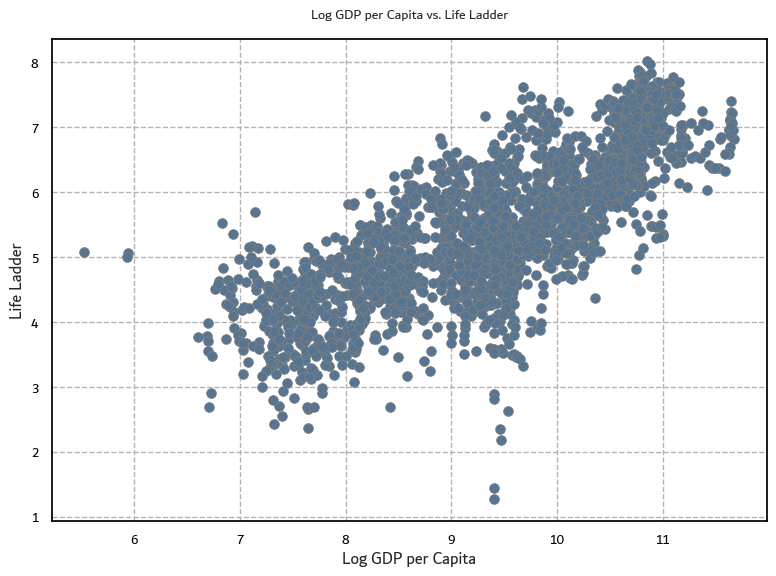

In [10]:
# Set plot style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Set output path
output_path = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis\6.4_Scatterplot of GDP vs. Life Ladder.jpg"

# Create figure
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    data=df,
    x='Log GDP per capita',
    y='Life Ladder',
    s=50,
    color='#577590',
    edgecolor='0.5',
    linewidth=0.5
)

# Style
ax.grid(True, linestyle='--', color='0.7')
for spine in ax.spines.values():
    spine.set_color('black')
ax.tick_params(axis='both', direction='out', length=6, width=1, colors='black')

# Labels
plt.title('Log GDP per Capita vs. Life Ladder', fontsize=16, fontproperties=dubai_font, pad=15)
plt.xlabel('Log GDP per Capita', fontsize=12, fontproperties=dubai_font)
plt.ylabel('Life Ladder', fontsize=12, fontproperties=dubai_font)
plt.xticks(fontproperties=dubai_font)
plt.yticks(fontproperties=dubai_font)

# Save figure
plt.tight_layout()
plt.savefig(output_path, dpi=600, format='jpg')
plt.show()

#### 🔹 H1: Economic Wealth and Happiness
**Countries with higher Log GDP per capita will have significantly higher Life Ladder (happiness) scores.**

### Reshaping Variables for Regression

In [6]:
# Define X (independent) and y (dependent)
X = df['Log GDP per capita'].values.reshape(-1, 1)
y = df['Life Ladder'].values.reshape(-1, 1)

In [18]:
print(X[:5])
print(y[:5])

[[7.35 ]
 [7.509]
 [7.614]
 [7.581]
 [7.661]]
[[3.724]
 [4.402]
 [4.758]
 [3.832]
 [3.783]]


### Spliting the Data into Training and Test Sets

In [7]:
from sklearn.model_selection import train_test_split

# Split data: 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Running a Linear Regression

In [8]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict y values using the test set
y_pred = model.predict(X_test)

### Plotting the Regression Line

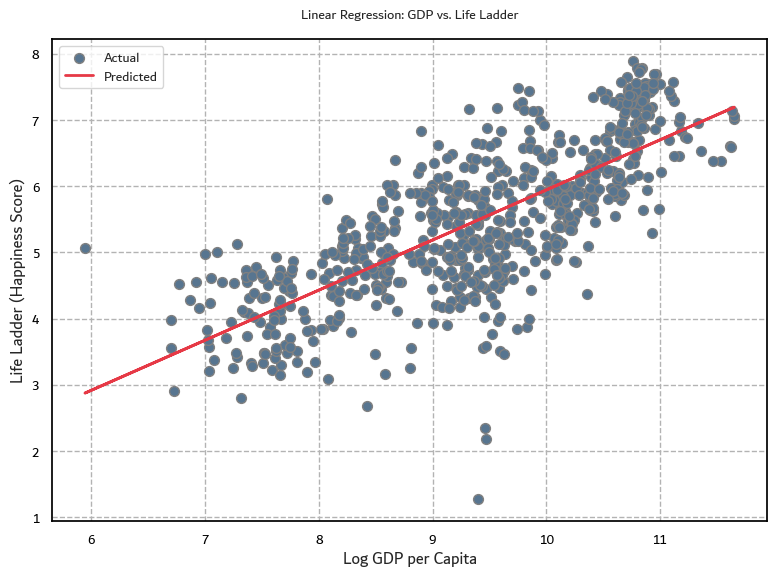

In [22]:
# Set output path
output_path = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis\6.4_Regression Plot of GDP vs. Life Ladder.jpg"

# Set style
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='#577590', s=50, edgecolor='0.5', label='Actual')  # Dark blue
plt.plot(X_test, y_pred, color='#e63946', linewidth=2, label='Predicted')  # Red

# Grid and borders
plt.grid(True, linestyle='--', color='0.7')
for spine in plt.gca().spines.values():
    spine.set_color('black')
plt.gca().tick_params(axis='both', direction='out', length=6, width=1, colors='black')

# Labels and title
plt.xlabel('Log GDP per Capita', fontsize=12, fontproperties=dubai_font)
plt.ylabel('Life Ladder (Happiness Score)', fontsize=12, fontproperties=dubai_font)
plt.title('Linear Regression: GDP vs. Life Ladder', fontsize=16, fontproperties=dubai_font, pad=15)
plt.xticks(fontproperties=dubai_font)
plt.yticks(fontproperties=dubai_font)

# Legend
plt.legend(prop=dubai_font)

# Save and show
plt.tight_layout()
plt.savefig(output_path, dpi=600, format='jpg')
plt.show()

In [9]:
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the model summary statistics
print(f"Slope (Coefficient): {float(model.coef_[0]):.4f}")
print(f"Intercept: {float(model.intercept_):.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Slope (Coefficient): 0.7566
Intercept: -1.6208
Root Mean Squared Error (RMSE): 0.7446
R² Score: 0.5734


C:\Users\moein\AppData\Local\Temp\ipykernel_22376\1508020767.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Slope (Coefficient): {float(model.coef_[0]):.4f}")
C:\Users\moein\AppData\Local\Temp\ipykernel_22376\1508020767.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Intercept: {float(model.intercept_):.4f}")


### 📈 Interpretation of the Regression Fit

The linear regression model estimates the relationship between **Log GDP per capita** and **Life Ladder (happiness score)** with the following equation:

**Life Ladder = 0.76 × Log GDP – 1.62**

This suggests a **moderate positive relationship**: for every one unit increase in Log GDP per capita, the expected increase in happiness score is approximately **0.76**.

However, the **R² score of 0.573** indicates that only about **57% of the variation in happiness** can be explained by GDP alone. The **Root Mean Squared Error (RMSE) of 0.745** shows that predictions from the model deviate from actual values by around 0.75 points on average.

While the regression line follows the overall upward trend, the **spread of actual values around the line**—particularly at higher GDP levels—suggests that **GDP alone doesn't fully capture the variation in happiness**. To improve the model, additional factors like **social support, health, or freedom to make life choices** could be considered.

### Check Model Performance

### Comparing Actual vs. Predicted Values in a DataFrame

In [10]:
# Create a DataFrame to compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': y_test.flatten(),     # Flatten turns 2D array into 1D for readability
    'Predicted': y_pred.flatten()
})

# Show the first 10 rows
comparison_df.head(10)

,Actual,Predicted
0,5.252,4.779673
1,6.553,6.189140
2,5.549,4.783456
3,4.554,4.974865
4,6.013,4.926445
5,5.767,5.109532
6,5.465,5.488568
7,3.762,5.584650
8,5.793,6.440317
9,5.938,6.269335


### 🧠 Model Performance Reflection

The linear regression model showed a **moderate fit**, with an **R² score of 0.5734** and an **MSE of 0.55**. This means the model was able to explain approximately **57% of the variance** in Life Ladder (happiness) scores based on Log GDP per capita.

The predicted values follow the general trend, but there are noticeable discrepancies between the actual and predicted scores for individual countries. For example:

| Actual | Predicted |
|--------|-----------|
| 5.252  | 4.78      |
| 3.762  | 5.58      |
| 6.013  | 4.93      |

In these cases, the **model under- or overestimates happiness** by 0.5 to 1.8 points, which is significant given that Life Ladder scores typically range between 2 and 8.

### 🔍 Reflections on Bias

It’s likely that **GDP alone doesn’t fully capture what makes a population happy**. Variables like **social support**, **freedom**, **corruption perception**, or **mental health metrics** may play a substantial role but are not included in this single-variable model.

Additionally, there may be **data bias** from:
- **Regional sampling**: Some regions may be over- or underrepresented.
- **Survey response bias**: Happiness scores are subjective.
- **Cultural differences**: The meaning of “happiness” may vary between countries, yet it’s treated uniformly.

These factors could limit the model’s accuracy and **explain the large residuals** seen in the predictions.

### ✅ Conclusion

While the model captures a general relationship between economic wealth and happiness, **it is not strong enough to make reliable individual predictions**. A more robust model with **multiple predictors** and possibly non-linear techniques may perform better.

### Add Decision Tree & Feature Importance

C:\Users\moein\AppData\Local\Temp\ipykernel_22376\224036963.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


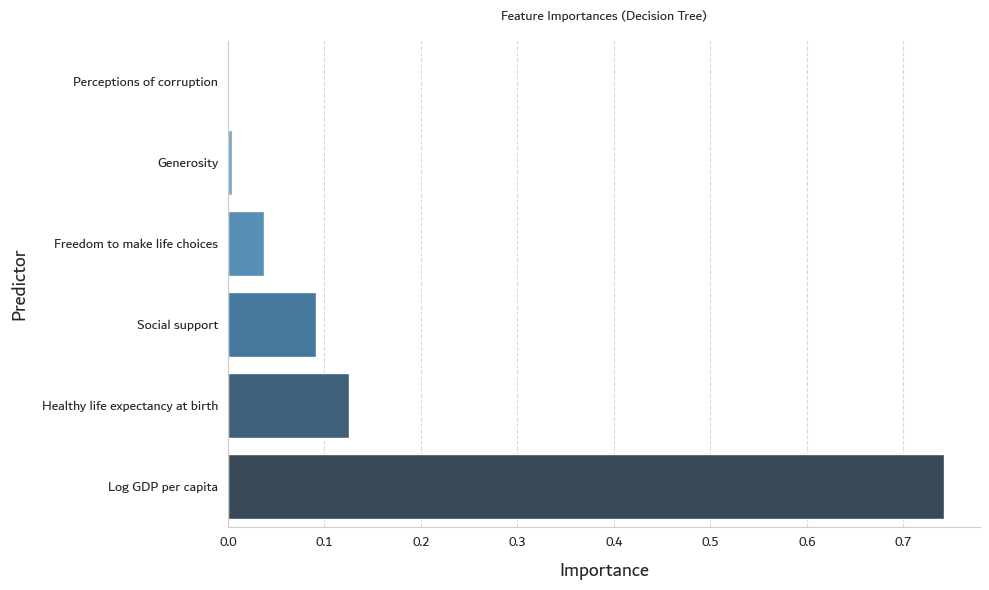

In [12]:
# Define features and target
features = ['Log GDP per capita', 'Social support', 'Freedom to make life choices',
            'Healthy life expectancy at birth', 'Generosity', 'Perceptions of corruption']
X_full = df[features]
y_full = df['Life Ladder']

# Train Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_full, y_full)

# Extract and sort feature importances
importances = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=feature_importance_df,
    x='Importance',
    y='Feature',
    palette='Blues_d'
)

# Apply font and styling
ax.set_title("Feature Importances (Decision Tree)", fontsize=18, fontproperties=dubai_font, pad=15)
ax.set_xlabel("Importance", fontsize=14, fontproperties=dubai_font, labelpad=10)
ax.set_ylabel("Predictor", fontsize=14, fontproperties=dubai_font, labelpad=10)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.xticks(fontproperties=dubai_font)
plt.yticks(fontproperties=dubai_font)

# Hide top and right spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add light gridlines on x-axis
ax.grid(axis='x', linestyle='--', color='gray', alpha=0.3)

# Tight layout
plt.tight_layout()

# Save as JPEG
output_path = r"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis\6.4_feature_importance_decision_tree.jpg"
plt.savefig(output_path, dpi=600, format='jpg')
plt.show()